In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

df = pd.read_csv("CourbePoidsTaille.csv",sep=";")
df.rename(columns={"Taille (centimetre)":"TAILLE","Poids (kilogramme)":"POIDS"},inplace=True)
df

,POIDS,TAILLE
0,70,155
1,63,150
2,72,180
3,60,135
4,66,156
5,70,168
6,74,178
7,65,160
8,62,132
9,67,145


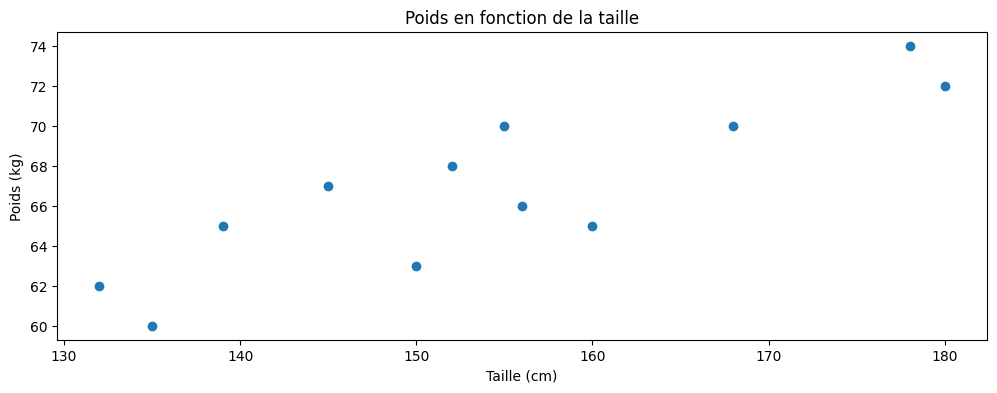

In [199]:
n = 12

plt.figure(figsize=(12,4))
plt.scatter(df['TAILLE'], df['POIDS'])
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.title('Poids en fonction de la taille')
plt.show()

In [200]:
cov = df.cov()
cov

,POIDS,TAILLE
POIDS,17.424242,56.030303
TAILLE,56.030303,241.787879


In [201]:
a = df.cov()['TAILLE']['POIDS']/df.cov()['TAILLE']['TAILLE']
b = df['POIDS'].mean() - a * df['TAILLE'].mean()
a,b

(np.float64(0.23173329991226965), np.float64(31.10778293019176))

In [202]:
df['Modele Poids vs Taille'] = a * df['TAILLE'] + b
df

,POIDS,TAILLE,Modele Poids vs Taille
0,70,155,67.026444
1,63,150,65.867778
2,72,180,72.819777
3,60,135,62.391778
4,66,156,67.258178
5,70,168,70.038977
6,74,178,72.356310
7,65,160,68.185111
8,62,132,61.696579
9,67,145,64.709111


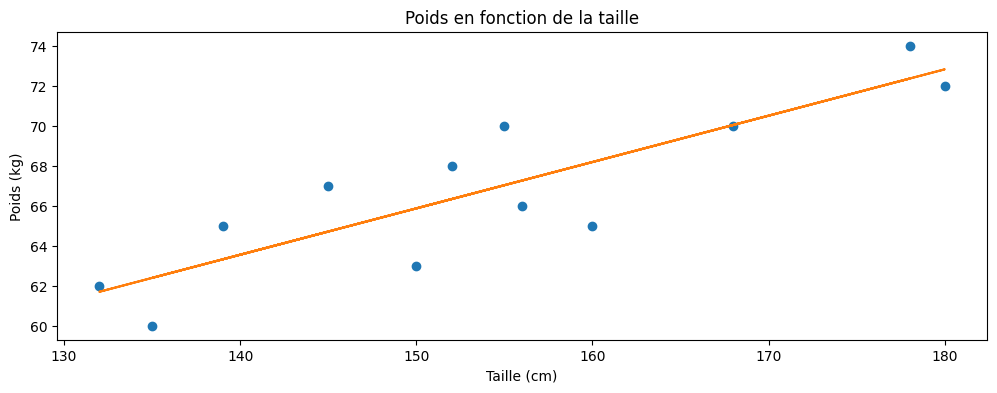

Poids d'un étudiant de 178 cm : 72.35631031457575 kg


In [203]:
plt.figure(figsize=(12,4))
plt.plot(df['TAILLE'], df['POIDS'], 'o')
plt.plot(df['TAILLE'], df['Modele Poids vs Taille'], '-')
plt.xlabel('Taille (cm)')
plt.ylabel('Poids (kg)')
plt.title('Poids en fonction de la taille')
plt.show()

print(f"Poids d'un étudiant de 178 cm : {a*178+b} kg")

In [204]:
aa = df.cov()['TAILLE']['POIDS']/df.cov()['POIDS']['POIDS']
bb = df['TAILLE'].mean() - aa * df['POIDS'].mean()
aa,bb

(np.float64(3.215652173913043), np.float64(-60.74608695652171))

In [205]:
df['Modele Taille vs poids'] = aa * df['POIDS'] + bb
df

,POIDS,TAILLE,Modele Poids vs Taille,Modele Taille vs poids
0,70,155,67.026444,164.349565
1,63,150,65.867778,141.840000
2,72,180,72.819777,170.780870
3,60,135,62.391778,132.193043
4,66,156,67.258178,151.486957
5,70,168,70.038977,164.349565
6,74,178,72.356310,177.212174
7,65,160,68.185111,148.271304
8,62,132,61.696579,138.624348
9,67,145,64.709111,154.702609


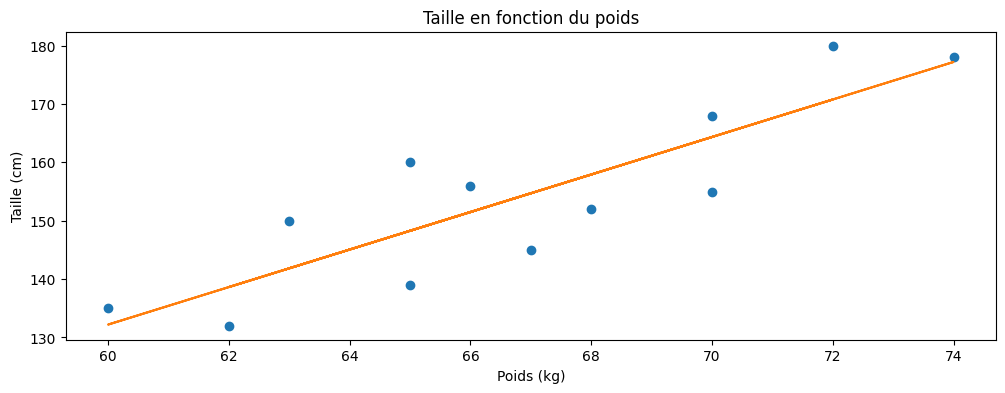

Taille pour un gars de 63 kg : 141.84 cm


In [206]:
plt.figure(figsize=(12,4))
plt.plot(df['POIDS'], df['TAILLE'], 'o')
plt.plot(df['POIDS'], df['Modele Taille vs poids'], '-')
plt.xlabel('Poids (kg)')
plt.ylabel('Taille (cm)')
plt.title('Taille en fonction du poids')
plt.show()

print(f"Taille pour un gars de 63 kg : {aa*63+bb} cm")

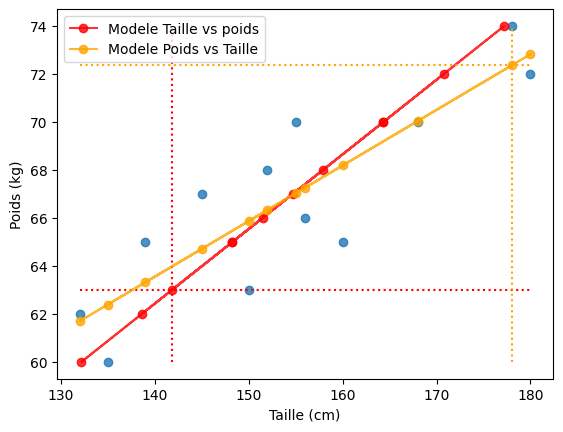

In [207]:
plt.plot(df['TAILLE'],df['POIDS'],'o',alpha=0.8)

plt.plot(df['Modele Taille vs poids'], df['POIDS'], '-o', alpha=0.8, color='red', label='Modele Taille vs poids')
plt.hlines(y=63, xmin=np.min(df['TAILLE']), xmax=np.max(df['TAILLE']), color='red', linestyles='dotted')
plt.vlines(x=aa*63+bb, ymin=np.min(df['POIDS']), ymax=np.max(df['POIDS']), color='red', linestyles='dotted')

plt.plot(df['TAILLE'], df['Modele Poids vs Taille'], '-o', alpha=0.8, color='orange', label='Modele Poids vs Taille')
plt.vlines(x=178, ymin=np.min(df['POIDS']), ymax=np.max(df['POIDS']), color='orange', linestyles='dotted')
plt.hlines(y=a*178+b, xmin=np.min(df['TAILLE']), xmax=np.max(df['TAILLE']), color='orange', linestyles='dotted')

plt.ylabel('Poids (kg)')
plt.xlabel('Taille (cm)')
plt.legend()
plt.show()